In [ ]:
import pandas_datareader as pdr

In [ ]:
pdr.__version__

'0.9.0'

In [ ]:
!pip install --upgrade pandas_datareader

     |████████████████████████████████| 109 kB 26.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import pandas_datareader as pdr
pdr.__version__

'0.10.0'

# Shiller's CAPE index

In [ ]:
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 5.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
shiller = pd.read_excel('http://www.econ.yale.edu/~shiller/data/ie_data.xls',
              sheet_name='Data', skiprows=range(7),
              skipfooter=1, usecols='A:E',
              dtype={'Date':str})

In [ ]:
shiller.head(15)

,Date,P,D,E,CPI
0,1871.01,4.44,0.2600,0.4000,12.464061
1,1871.02,4.50,0.2600,0.4000,12.844641
2,1871.03,4.61,0.2600,0.4000,13.034972
3,1871.04,4.74,0.2600,0.4000,12.559226
4,1871.05,4.86,0.2600,0.4000,12.273812
5,1871.06,4.82,0.2600,0.4000,12.083481
6,1871.07,4.73,0.2600,0.4000,12.083481
7,1871.08,4.79,0.2600,0.4000,11.893231
8,1871.09,4.84,0.2600,0.4000,12.178646
9,1871.1,4.59,0.2600,0.4000,12.368896


In [ ]:
shiller['Date'] = pd.date_range(start='1871-01-31', periods=len(shiller),
                                freq='M')

shiller = shiller.set_index('Date')

shiller.head()

,P,D,E,CPI
Date,,,,
1871-01-31,4.44,0.26,0.4,12.464061
1871-02-28,4.50,0.26,0.4,12.844641
1871-03-31,4.61,0.26,0.4,13.034972
1871-04-30,4.74,0.26,0.4,12.559226
1871-05-31,4.86,0.26,0.4,12.273812


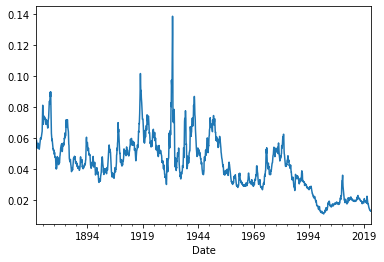

In [ ]:
(shiller['D'] / shiller['P']).plot()

In [ ]:
shiller

,P,D,E,CPI
Date,,,,
1871-01-31,4.440000,0.260000,0.4,12.464061
1871-02-28,4.500000,0.260000,0.4,12.844641
1871-03-31,4.610000,0.260000,0.4,13.034972
1871-04-30,4.740000,0.260000,0.4,12.559226
1871-05-31,4.860000,0.260000,0.4,12.273812
...,...,...,...,...
2021-10-31,4460.707143,59.635361,NaN,276.589000
2021-11-30,4667.386667,60.016239,NaN,277.948000
2021-12-31,4674.772727,60.397117,NaN,278.802000


In [ ]:
shiller = shiller.dropna()

In [ ]:
shiller

,P,D,E,CPI
Date,,,,
1871-01-31,4.440000,0.260000,0.400000,12.464061
1871-02-28,4.500000,0.260000,0.400000,12.844641
1871-03-31,4.610000,0.260000,0.400000,13.034972
1871-04-30,4.740000,0.260000,0.400000,12.559226
1871-05-31,4.860000,0.260000,0.400000,12.273812
...,...,...,...,...
2021-05-31,4167.849500,57.787824,148.573333,269.195000
2021-06-30,4238.489545,57.865042,158.760000,271.696000
2021-07-31,4363.712857,58.328189,164.316667,273.003000


In [ ]:
shiller['CPI'].loc['1990-07']

Date
1990-07-31    130.4
Name: CPI, dtype: float64

In [ ]:
shiller['CPI'].iloc[-1]

279.44250000000005

In [ ]:
shiller['CPI'].loc['1990'] / shiller['CPI'].iloc[-1]

Date
1990-01-31    0.455908
1990-02-28    0.458055
1990-03-31    0.460560
1990-04-30    0.461276
1990-05-31    0.462349
1990-06-30    0.464854
1990-07-31    0.466643
1990-08-31    0.470938
1990-09-30    0.474874
1990-10-31    0.477737
1990-11-30    0.478810
1990-12-31    0.478810
Name: CPI, dtype: float64

In [ ]:
shiller['CPI_factor'] = shiller['CPI'] / shiller['CPI'].iloc[-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
shiller

,P,D,E,CPI,CPI_factor
Date,,,,,
1871-01-31,4.440000,0.260000,0.400000,12.464061,0.045438
1871-02-28,4.500000,0.260000,0.400000,12.844641,0.046825
1871-03-31,4.610000,0.260000,0.400000,13.034972,0.047519
1871-04-30,4.740000,0.260000,0.400000,12.559226,0.045785
1871-05-31,4.860000,0.260000,0.400000,12.273812,0.044744
...,...,...,...,...,...
2021-05-31,4167.849500,57.787824,148.573333,269.195000,0.981353
2021-06-30,4238.489545,57.865042,158.760000,271.696000,0.990471
2021-07-31,4363.712857,58.328189,164.316667,273.003000,0.995235


In [ ]:
shiller['p_real'] = shiller['P'] / shiller['CPI_factor']
shiller['d_real'] = shiller['D'] / shiller['CPI_factor']
shiller['e_real'] = shiller['E'] / shiller['CPI_factor']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
shiller

,P,D,E,CPI,CPI_factor,p_real,d_real,e_real
Date,,,,,,,,
1871-01-31,4.440000,0.260000,0.400000,12.464061,0.045438,97.715856,5.722100,8.803230
1871-02-28,4.500000,0.260000,0.400000,12.844641,0.046825,96.101944,5.552557,8.542395
1871-03-31,4.610000,0.260000,0.400000,13.034972,0.047519,97.013565,5.471481,8.417663
1871-04-30,4.740000,0.260000,0.400000,12.559226,0.045785,103.527825,5.678741,8.736525
1871-05-31,4.860000,0.260000,0.400000,12.273812,0.044744,108.617164,5.810795,8.939684
...,...,...,...,...,...,...,...,...
2021-05-31,4167.849500,57.787824,148.573333,269.195000,0.981353,4247.043208,58.885856,151.396389
2021-06-30,4238.489545,57.865042,158.760000,271.696000,0.990471,4279.268253,58.421764,160.287437
2021-07-31,4363.712857,58.328189,164.316667,273.003000,0.995235,4384.604103,58.607435,165.103332


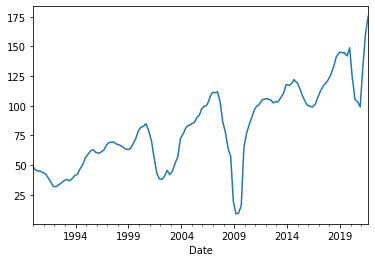

In [ ]:
shiller.loc['1990':, 'e_real'].plot()

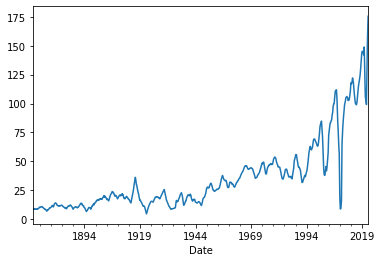

In [ ]:
shiller['e_real'].plot()

In [ ]:
r = shiller.rolling(window=120, min_periods=100)

In [ ]:
r['e_real'].mean().iloc[95:105]

Date
1878-12-31         NaN
1879-01-31         NaN
1879-02-28         NaN
1879-03-31         NaN
1879-04-30    9.273566
1879-05-31    9.294336
1879-06-30    9.317938
1879-07-31    9.341650
1879-08-31    9.366807
1879-09-30    9.389435
Name: e_real, dtype: float64

In [ ]:
shiller['CAPE'] = shiller['p_real'] / r['e_real'].mean().shift()

shiller.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,P,D,E,CPI,CPI_factor,p_real,d_real,e_real,CAPE
Date,,,,,,,,,
2021-05-31,4167.849500,57.787824,148.573333,269.195,0.981353,4247.043208,58.885856,151.396389,36.552134
2021-06-30,4238.489545,57.865042,158.760000,271.696,0.990471,4279.268253,58.421764,160.287437,36.696258
2021-07-31,4363.712857,58.328189,164.316667,273.003,0.995235,4384.604103,58.607435,165.103332,37.443383
2021-08-31,4454.206364,58.791336,169.873333,273.567,0.997291,4466.303858,58.951011,170.334704,37.973501
2021-09-30,4445.543333,59.254483,175.430000,274.310,1.000000,4445.543333,59.254483,175.430000,37.620347


In [ ]:
import pandas_datareader as pdr

In [ ]:
nber = pdr.get_data_fred('USREC', '1870')

nber.head()

,USREC
DATE,
1870-01-01,1
1870-02-01,1
1870-03-01,1
1870-04-01,1
1870-05-01,1


In [ ]:
nber.describe()

,USREC
count,1827.000000
mean,0.281336
std,0.449774
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# make the dates in NBER data move to the end of the month

from pandas.tseries.offsets import MonthEnd

In [ ]:
nber.index

DatetimeIndex(['1870-01-01', '1870-02-01', '1870-03-01', '1870-04-01',
               '1870-05-01', '1870-06-01', '1870-07-01', '1870-08-01',
               '1870-09-01', '1870-10-01',
               ...
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='DATE', length=1827, freq=None)

In [ ]:
nber.index + MonthEnd(0)

DatetimeIndex(['1869-09-30', '1869-10-31', '1869-11-30', '1869-12-31',
               '1870-01-31', '1870-02-28', '1870-03-31', '1870-04-30',
               '1870-05-31', '1870-06-30',
               ...
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30'],
              dtype='datetime64[ns]', name='DATE', length=1827, freq=None)

In [ ]:
nber.index = nber.index + MonthEnd(0)

In [ ]:
nber

,USREC
DATE,
1870-01-31,1
1870-02-28,1
1870-03-31,1
1870-04-30,1
1870-05-31,1
...,...
2021-11-30,0
2021-12-31,0
2022-01-31,0


In [ ]:
shiller = shiller.join(nber)

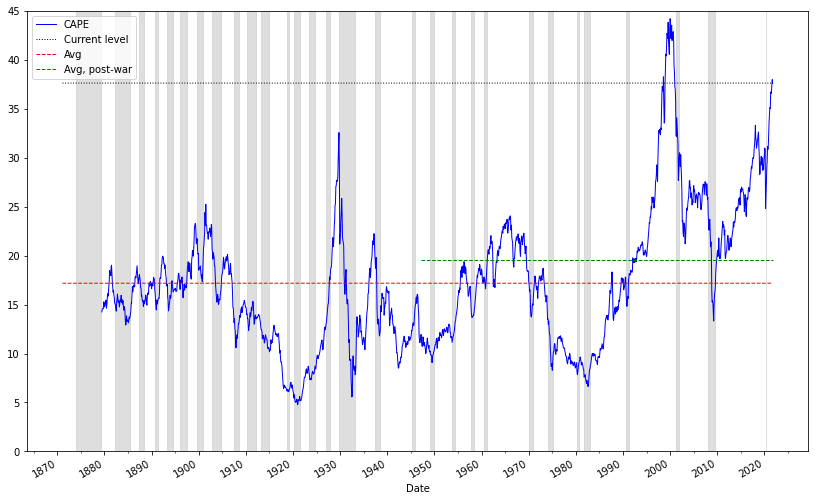

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator

# create Series with means and current value repeated
avg = pd.Series(shiller['CAPE'].mean(), index=shiller.index)
avg47 = pd.Series(shiller.loc['1947':,'CAPE'].mean(), index=shiller.loc['1947':].index)
curentval = pd.Series(shiller['CAPE'].iloc[-1], index=shiller.index)

# main plot
ax = shiller['CAPE'].plot(figsize=(14,9), ylim=(0,45), legend=True, x_compat=True, c='b', lw=1)

# change year locations
yrs10 = YearLocator(10)
yrs5 = YearLocator(5)
ax.xaxis.set_major_locator(yrs10)
ax.xaxis.set_minor_locator(yrs5)

# add bells & whistles
curentval.plot(ax=ax, label='Current level', legend=True, c='k', ls=':', lw=1)
avg.plot(ax=ax, label='Avg', legend=True, c='r', ls='--', lw=1)
avg47.plot(ax=ax, label='Avg, post-war', legend=True, c='g', ls='--', lw=1)
plt.legend(loc='upper left', fontsize='medium')

ax.fill_between(shiller['CAPE'].index, 0, 45, where=shiller['USREC']==1, 
                facecolor='lightgrey', edgecolor='lightgrey', alpha=0.75)

## Correlations

The correlation between two series, $x$ and $y$, is calculated as

$$\rho_{x,y} = \frac{\text{Cov}(x,y)}{\sigma_x\sigma_y} = \frac{\sum_{t=1}^T (x_t-\bar x)(y_t-\bar y)}{\sqrt{\sum (x_t-\bar x)^2}\sqrt{\sum (y_t-\bar y)^2}},$$

where $\sigma_x$ is the standard deviation of $x$:

$$\sigma_x = \sqrt{\sum_{t=1}^T (x_t-\bar x)^2}.$$

The term in the numerator of the correlation is the *covariance*.

Using a result in math called the [Cauchy–Schwarz](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Schwarz_inequality) inequality, it can be shown that 

$$|\rho_{x,y}| \leq 1.$$

Correlation is a measure of the *linear* relation between two variables. It does not capture nonlinear relations, which is nicely illustrated in [this picture from Wikipedia:

![image](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

Every example in the last row shows a data pattern where the correlation is zero, despite having a clear (nonlinear) relation between the $x$ and $y$ axes.


In [ ]:
shiller['ret2yr'] = shiller['p_real'].shift(-2*12) / shiller['p_real'] - 1
shiller['ret5yr'] = shiller['p_real'].shift(-5*12) / shiller['p_real'] - 1

In [ ]:
shiller[['CAPE', 'ret2yr', 'ret5yr']].corr()

,CAPE,ret2yr,ret5yr
CAPE,1.000000,-0.174035,-0.257124
ret2yr,-0.174035,1.000000,0.577749
ret5yr,-0.257124,0.577749,1.000000
